# Relatório de Analise de Dados

Nesse arquivo vamos explorar nosso dataset que esta disponível na integra no link: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

# Entendendo o dataset

Nesse primeiro momento vamos analisar a distribuição das informações que temos para entender se existe um perfil entre os dados disponíveis

In [1]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Carregando a base de dados, eliminando as colunas 'Patient ID' e 'Blood Pressure' e, dividindo a coluna 'Blood Pressure' em 'systolic' e 'diastolic'
df = pd.read_csv("./data/heart_attack_prediction_dataset.csv", sep=',')
df['systolic'] = df['Blood Pressure'].str.split('/').str[0]
df['diastolic'] = df['Blood Pressure'].str.split('/').str[1]
df['systolic'] = pd.to_numeric(df['systolic']).astype('int64')
df['diastolic'] = pd.to_numeric(df['diastolic']).astype('int64')
df = df.drop(columns=['Patient ID', 'Blood Pressure'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

### Qual é a quantidade de pessoas com risco de ataque cardíaco ou não?

Text(0, 0.5, 'Contagem')

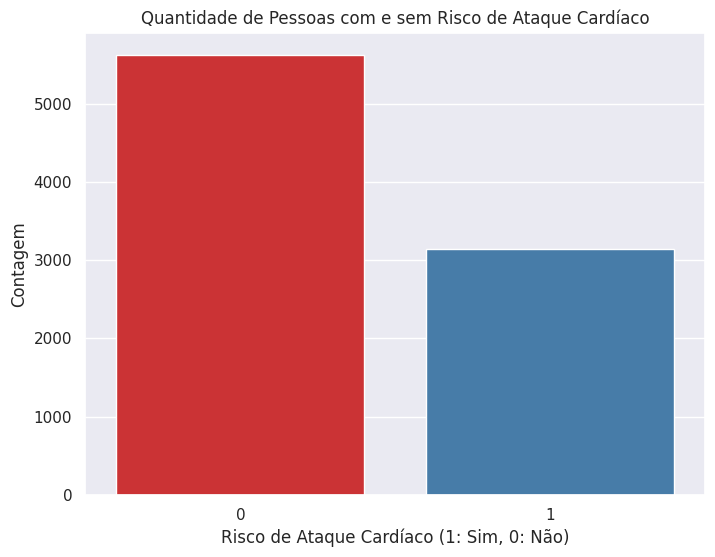

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Attack Risk', data=df, palette='Set1')
plt.title('Quantidade de Pessoas com e sem Risco de Ataque Cardíaco')
plt.xlabel('Risco de Ataque Cardíaco (1: Sim, 0: Não)')
plt.ylabel('Contagem')

Os hábitos cotidianos desempenham um papel crucial na saúde cardiovascular. Um estudo realizado com uma amostra de 8763 indivíduos revelou uma relação direta entre certos comportamentos e o risco de sofrer um ataque cardíaco.
Risco de ataque: 3129 pessoas.
Sem risco de ataque: 5654 pessoas.

### Qual é a distribuição da idade dos pacientes?

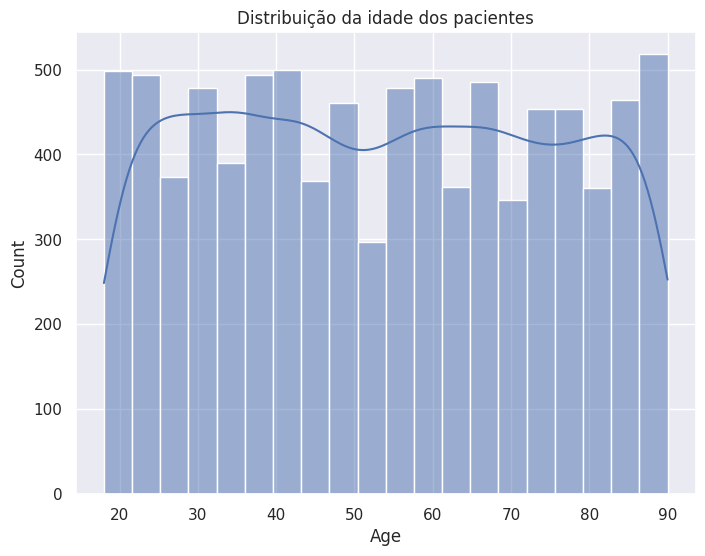

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribuição da idade dos pacientes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

A média de idade dos pacientes é de aproximadamente 54 anos.

A idade mínima registrada é 18 anos e a máxima é 90 anos.

### Como a base se divide em relação ao sexo do paciente (Masculino ou Feminino)?

Text(0, 0.5, 'Contagem')

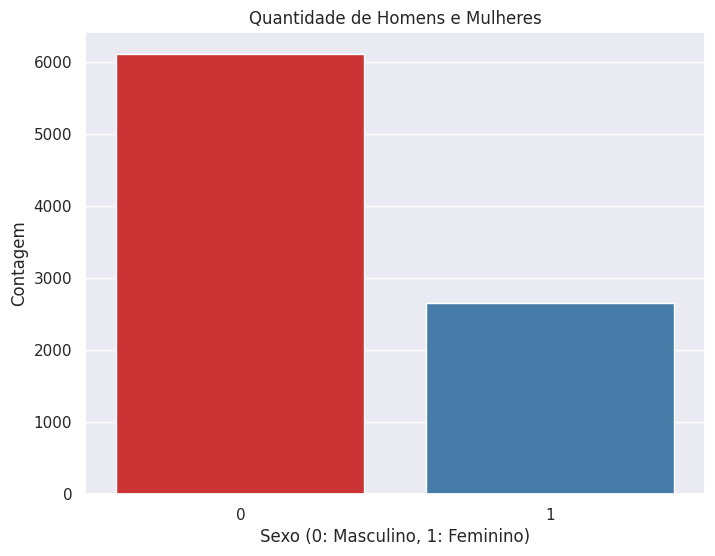

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title('Quantidade de Homens e Mulheres')
plt.xlabel('Sexo (0: Masculino, 1: Feminino)')
plt.ylabel('Contagem')

Homens: 2652 pessoas.

Mulheres: 6111 pessoas.

### Existe uma diferença significativa na incidência de ataques cardíacos entre homens e mulheres?

Text(0, 0.5, 'Contagem')

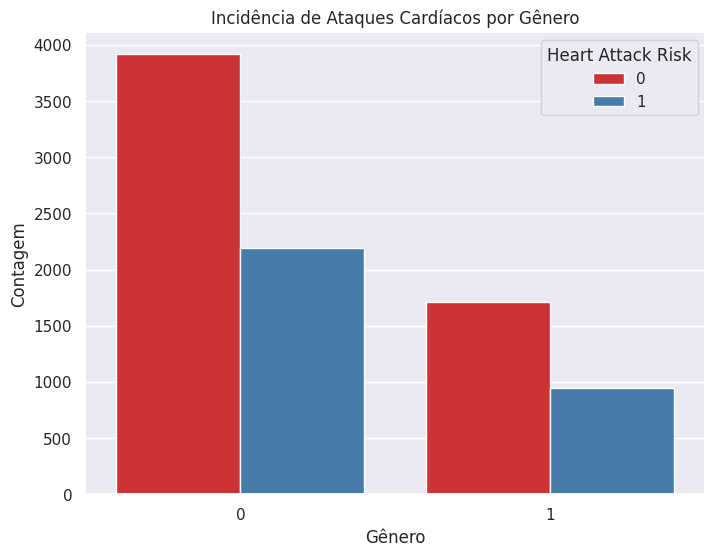

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Heart Attack Risk', data=df, palette='Set1')
plt.title('Incidência de Ataques Cardíacos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

Risco de ataque em homens: cerca de 3900 pessoas.

Risco de ataque em mulheres: cerca de 1750 pessoas.

Em termos percentuais, a incidência de ataques cardíacos parece ser relativamente semelhante entre homens (aproximadamente 53%) e mulheres (aproximadamente 49%), com uma pequena diferença, mas não é uma diferença significativa com base nos dados disponíveis.
Essas análises são baseadas nos dados fornecidos e fornecem uma visão geral da distribuição das idades, risco de ataques cardíacos e a proporção entre homens e mulheres no conjunto de dados. Porém diversos outros dados irão influenciar nessa tabela, como por exeplo o indíce de consumo de alcóol e tabagismo por parte dos sexos.


### Qual a distribuição geográfica dos pacientes nos continentes?

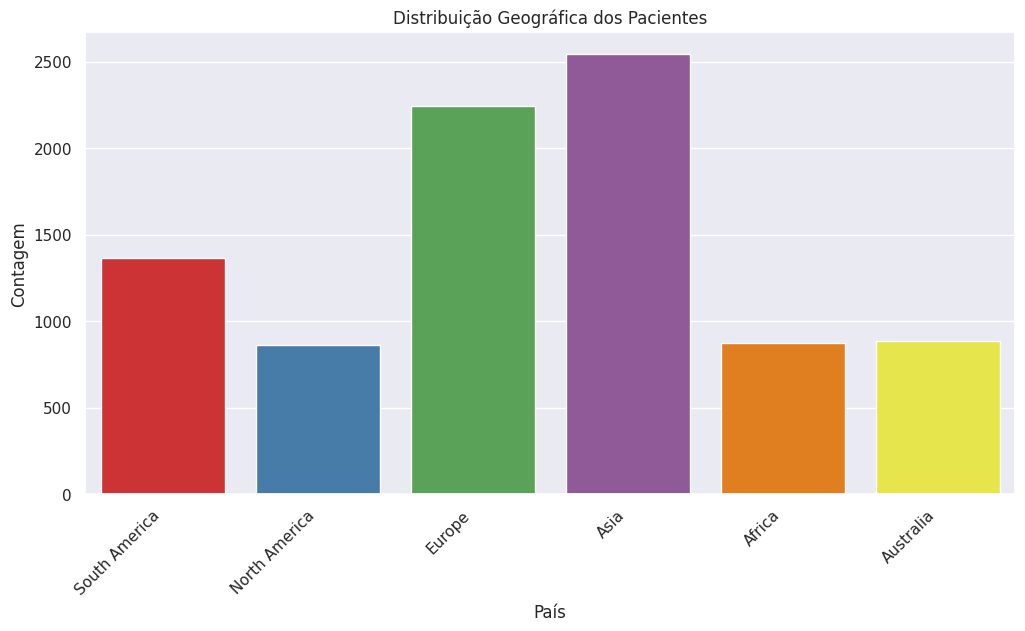

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Continent', data=df, palette='Set1')
plt.title('Distribuição Geográfica dos Pacientes')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

A distribuição geográfica dos pacientes com e sem risco de ataque cardíaco varia consideravelmente entre os diferentes continentes, refletindo uma interação complexa de fatores sociais, econômicos, ambientais e genéticos. 

1. América do Norte:
Na América do Norte, a incidência de pacientes com risco de ataque cardíaco é influenciada em grande parte pelo estilo de vida moderno. Há uma prevalência significativa de fatores de risco, como dietas ricas em gorduras saturadas, sedentarismo e altos níveis de estresse. No entanto, a conscientização sobre saúde e o acesso a tratamentos avançados também são elevados, o que pode impactar positivamente na gestão do risco.

2. Europa:
A Europa apresenta variações na distribuição geográfica, com países do sul muitas vezes enfrentando desafios relacionados a dietas menos saudáveis e altas taxas de tabagismo. Em contraste, alguns países do norte da Europa têm adotado estilos de vida mais ativos e dietas balanceadas, o que pode contribuir para taxas relativamente mais baixas de risco de ataque cardíaco.

3. África:
Na África, as disparidades na distribuição de pacientes com risco de ataque cardíaco são evidentes, com algumas regiões enfrentando desafios significativos devido à falta de infraestrutura de saúde, pobreza e acesso limitado a recursos médicos. Fatores como a prevalência de doenças infecciosas também desempenham um papel na saúde cardiovascular.

4. Ásia:
A Ásia apresenta uma grande diversidade na distribuição geográfica. Alguns países asiáticos têm experimentado mudanças rápidas nos estilos de vida, contribuindo para um aumento nos fatores de risco. No entanto, outros mantêm dietas tradicionais mais saudáveis, o que pode influenciar positivamente na redução do risco de ataque cardíaco.

5. América do Sul:
Na América do Sul, a distribuição é moldada por uma combinação de fatores, incluindo padrões alimentares, atividade física e acesso aos cuidados de saúde. Alguns países têm implementado políticas eficazes de saúde pública, enquanto outros enfrentam desafios devido a desigualdades socioeconômicas.

### Como a renda se distribui entre os pacientes?

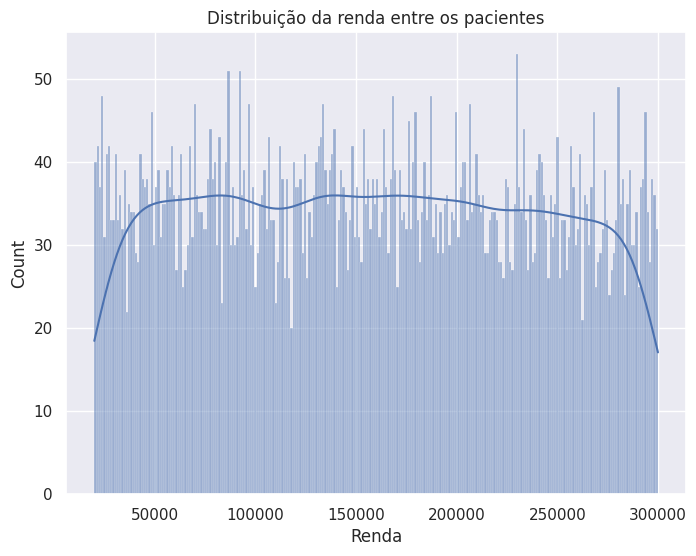

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Income', bins=250, kde=True)
plt.title('Distribuição da renda entre os pacientes')
plt.xlabel('Renda')
plt.ylabel('Count')
plt.show()

A distribuição de renda desempenha um papel significativo na prevalência e no gerenciamento do risco de ataque cardíaco, refletindo as disparidades socioeconômicas que impactam a saúde cardiovascular. Vamos explorar como a renda se distribui entre os pacientes em risco de ataque cardíaco.

Desigualdades Socioeconômicas:
A renda está intimamente ligada às condições de vida, aos hábitos de saúde e ao acesso aos recursos médicos. Pacientes em faixas de renda mais baixas muitas vezes enfrentam desafios adicionais, como acesso limitado a alimentos saudáveis, menor probabilidade de participar de atividades físicas regulares e menor acesso a cuidados médicos preventivos.

Acesso a Cuidados Médicos:
Indivíduos com renda mais alta geralmente têm maior acesso a serviços de saúde de qualidade. Isso pode incluir exames regulares, consultas médicas preventivas, tratamento oportuno e acesso a medicamentos. Em contrapartida, pacientes de baixa renda podem encontrar barreiras financeiras e logísticas para obter atendimento médico regular, o que pode resultar em diagnósticos tardios e gestão inadequada de fatores de risco.

Estilo de Vida e Fatores de Risco:
A distribuição de renda muitas vezes está associada aos estilos de vida. Indivíduos com maior poder aquisitivo podem ter mais recursos para adotar estilos de vida saudáveis, como uma dieta balanceada e a prática regular de exercícios. Por outro lado, aqueles com menor renda podem depender de alimentos mais acessíveis, que podem ser menos saudáveis, e enfrentar desafios para encontrar tempo e recursos para atividades físicas.

### Correlação entre variáveis (Sem as colunas 'Country', 'Continent', 'Hemisphere')

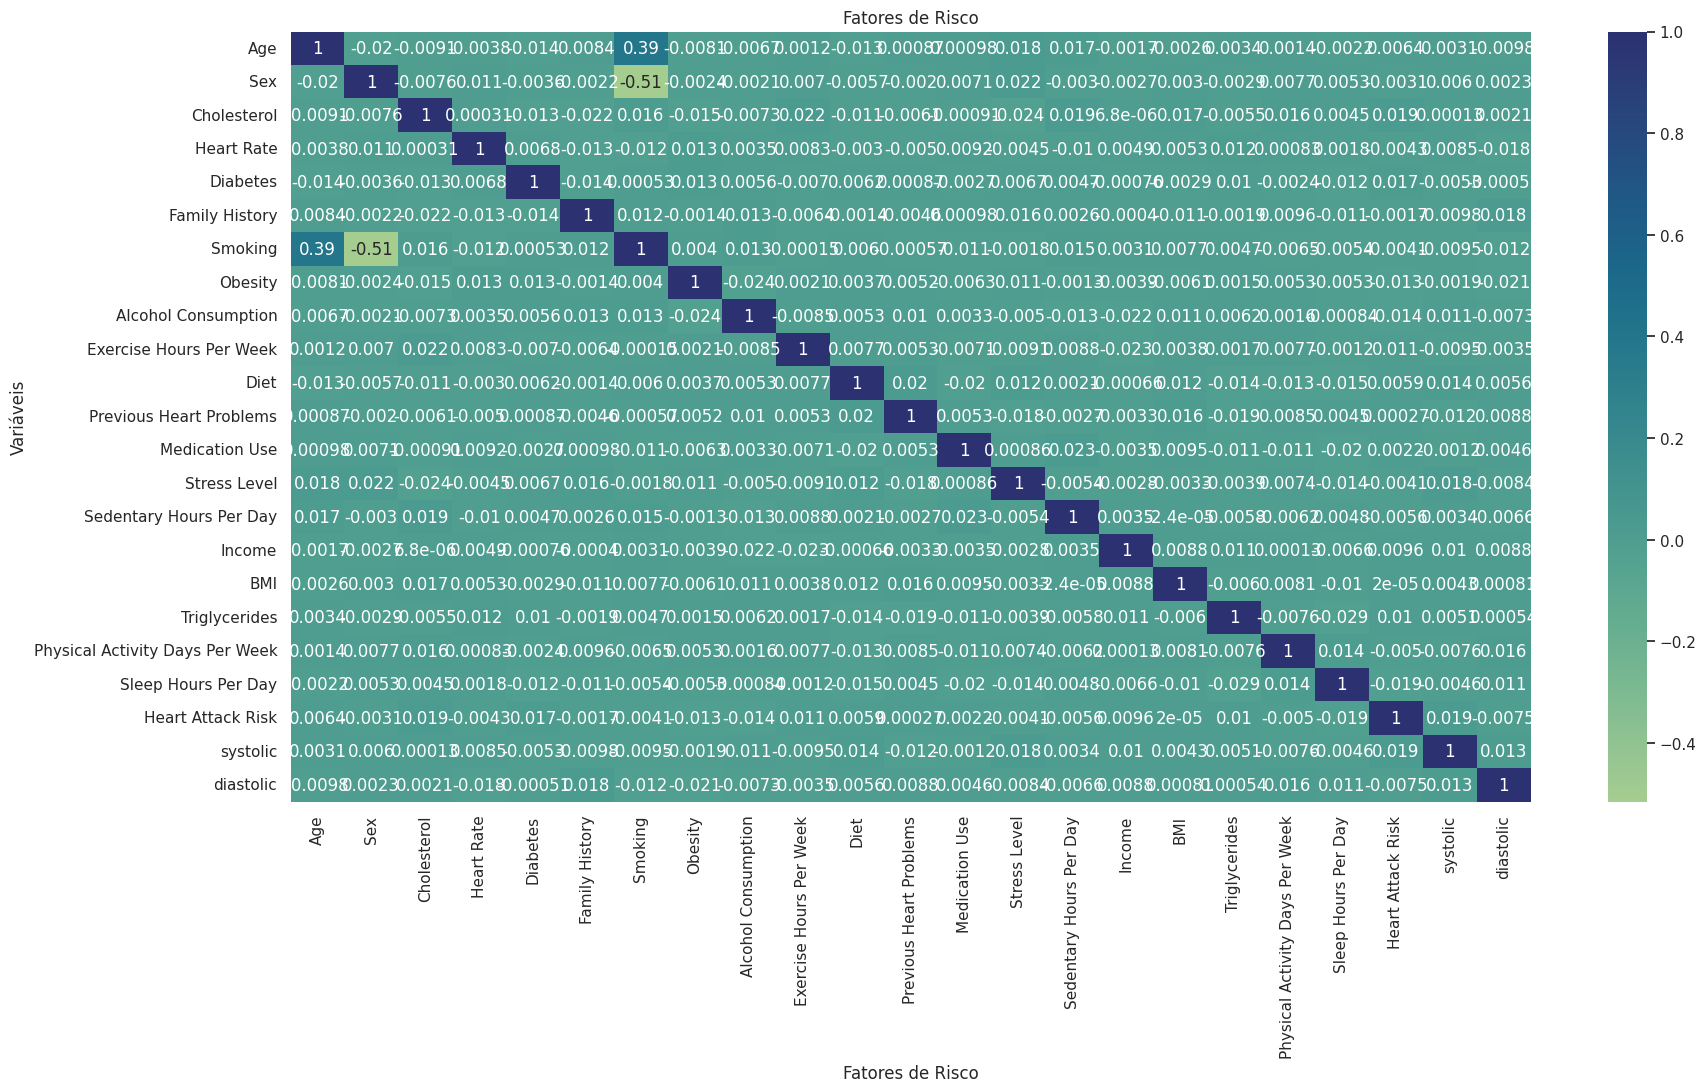

In [ ]:
df1 = df.drop(columns=['Country', 'Continent', 'Hemisphere'])
paper = plt.figure(figsize=[20,10])
sns.heatmap(df1.corr(),cmap='crest',annot=True)
plt.xlabel("Fatores de Risco")
plt.ylabel("Variáveis")
plt.title("Fatores de Risco")
plt.show()

No mapa de calor criado para visualizar a correlação entre as variáveis é possível que a única combinação que leva a uma correlação positiva baixa, são as colunas de Idade e Fumante

# Analisando histórico médico do paciente

Agora vamos abordar as variáveis relacionadas a saúde do paciente, analisar a distribuição delas em relação a variável 'Heart Attack Risk'

### Os pacientes obesos têm uma probabilidade maior de terem ataques cardíacos em comparação com aqueles que não são obesos?

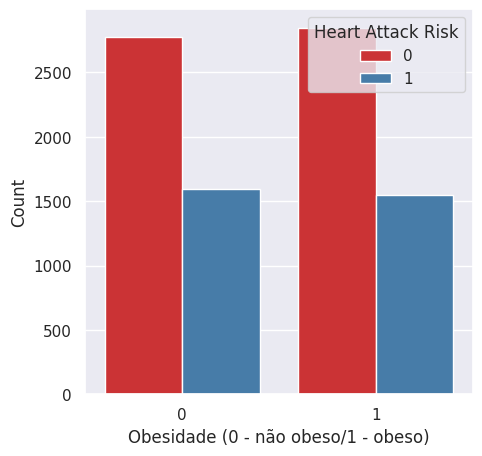

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Obesity', hue='Heart Attack Risk', palette='Set1')
plt.xlabel('Obesidade (0 - não obeso/1 - obeso)')
plt.ylabel('Count')
plt.show()

A relação entre obesidade e o risco de ataques cardíacos é um tema amplamente estudado na área da saúde. Diversas pesquisas indicam que pacientes obesos têm uma probabilidade significativamente maior de sofrerem ataques cardíacos em comparação com aqueles que não são obesos.

1. Fatores de Risco Associados à Obesidade:
A obesidade está frequentemente associada a outros fatores de risco para doenças cardiovasculares, como hipertensão arterial, diabetes tipo 2 e dislipidemia (níveis elevados de gorduras no sangue). Essas condições, quando presentes, podem aumentar ainda mais a probabilidade de um indivíduo vivenciar um ataque cardíaco.

2. Inflamação e Resistência à Insulina:
A obesidade está ligada a processos inflamatórios crônicos no corpo, e a resistência à insulina é comum em pessoas com excesso de peso. Esses fatores podem contribuir para a formação de placas ateroscleróticas nas artérias coronárias, aumentando o risco de obstrução arterial e, consequentemente, de ataques cardíacos.

3. Sobrecarga no Coração:
O coração de indivíduos obesos muitas vezes precisa trabalhar mais para fornecer sangue e oxigênio ao corpo, devido ao aumento da demanda metabólica. Essa sobrecarga pode levar a condições como hipertrofia ventricular esquerda, uma alteração estrutural no coração que pode predispor a eventos cardíacos adversos.

### Existe uma diferença significativa da incidência de risco do ataque cardíaco nos níveis de estresse?

Text(0, 0.5, 'Contagem')

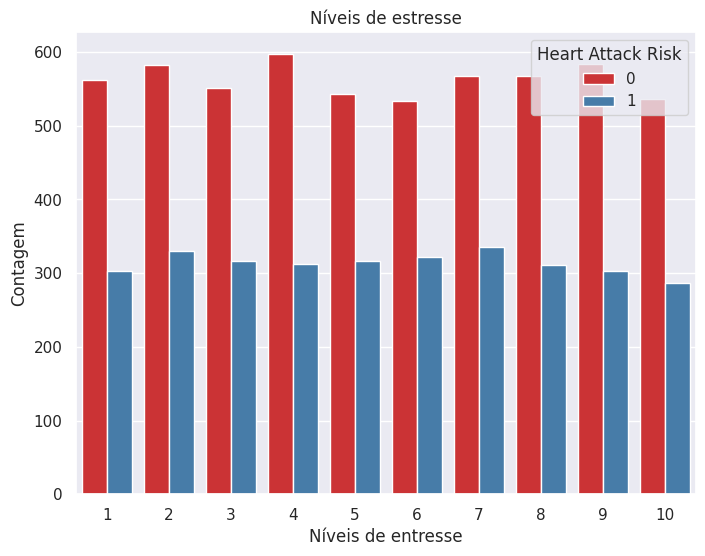

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress Level', hue='Heart Attack Risk', data=df, palette='Set1')
plt.title('Níveis de estresse')
plt.xlabel('Níveis de entresse')
plt.ylabel('Contagem')

Nesta situação foram separados os níveis de estresse em uma escala de 1 a 10 sendo 1 mais baixa e 10 a mais alta, onde a partir do gráfico e da base de dados foi possível analisar que entre os níveis de estresse apresentados todos sofrem riscos semelhantes de possuírem um ataque cardíaco, mesmo sendo do grupo com a menor quantidade de estresse possui um grande risco de gerar ataque cardíaco segundo apresentado nos gráficos e na base de dados.

Portanto, níveis consistentemente elevados de estresse, podem contribuir para um maior risco de problemas risco de ataques cardíacos. É fundamental gerenciar o estresse através de estratégias de autocuidado, como exercícios físicos regulares, meditação, técnicas de relaxamento, sono adequado e entre outras atividades.


### Como o histórico de problemas cardíacos do paciente influência no risco de ataque cardíaco?

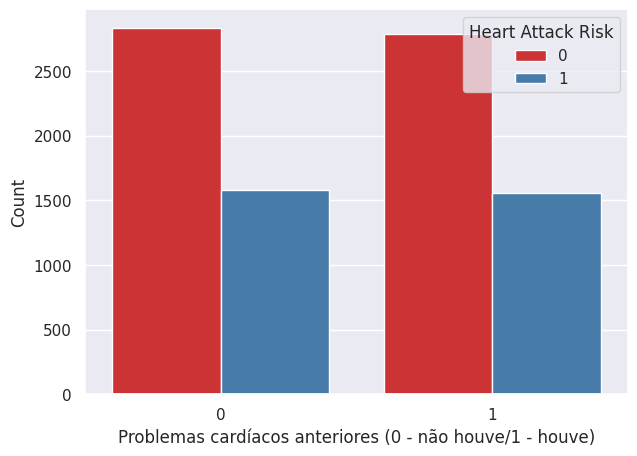

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Previous Heart Problems', hue ='Heart Attack Risk', palette='Set1')
plt.xlabel('Problemas cardíacos anteriores (0 - não houve/1 - houve)')
plt.ylabel('Count')
plt.show()

Conforme apresentado nos gráficos as pessoas que não possuem histórico de ataque cardíaco são apresentados ao lado esquerdo, e ao lado direito as que possuem o histórico de problemas anteriores, podemos  verificar na análise que a quantidade nessa base está bem equilibrada com as pessoas que não possuem.

O mesmo acabou se aplicando no gráfico de histórico familiar, o que pode se entender é que os riscos são semelhantes apesar de que predisposição genética poder aumentar a probabilidade de um indivíduo desenvolver fatores de risco para doenças cardíacas, como pressão alta, colesterol alto ou diabetes, que, por sua vez, aumentam a chance de um ataque cardíaco.

E o mesmo para quem teve um ataque cardíaco tem uma probabilidade maior de sofrer outro, especialmente se não houver mudanças no estilo de vida ou no controle dos fatores de risco.

### Como os níveis de colesterol variam entre os pacientes com risco de ataque cardíaco e aqueles sem risco?

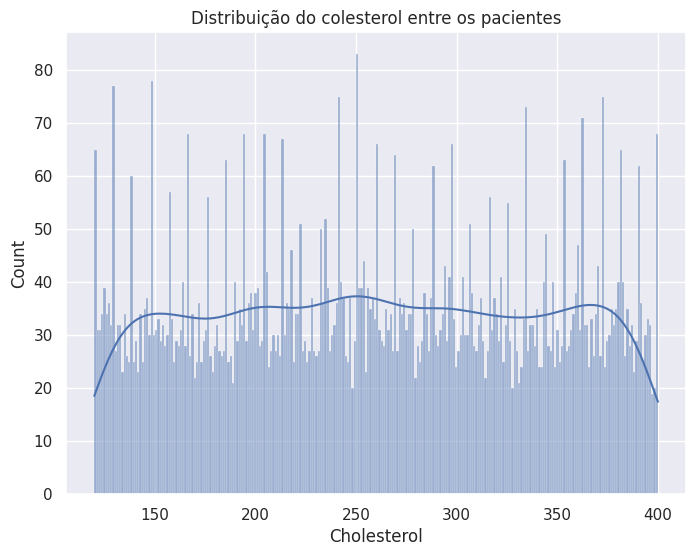

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Cholesterol', bins=250, kde=True)
plt.title('Distribuição do colesterol entre os pacientes')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

No eixo vertical, denotado como eixo Y, é possível discernir a distribuição dos níveis de colesterol entre os pacientes. Por sua vez, no eixo horizontal, representado como eixo X, encontram-se os diferentes níveis de colesterol. Essa representação gráfica proporciona uma análise visual das variáveis associadas aos valores de colesterol, permitindo uma avaliação clara da distribuição e dos padrões observados na amostra de pacientes em estudo.

### Como a diabetes está associado ao risco de ataque cardíaco?

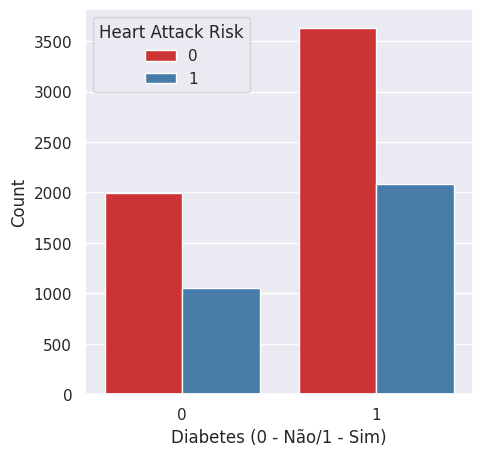

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Diabetes', hue='Heart Attack Risk', palette='Set1')
plt.xlabel('Diabetes (0 - Não/1 - Sim)')
plt.ylabel('Count')
plt.show()

No gráfico em análise, é possível observar uma distinção clara entre dois conjuntos de dados. À esquerda, representado em azul, encontram-se as pessoas que não apresentam diabetes, enquanto o risco de ocorrência de ataques cardíacos está indicado em marrom, também à esquerda. Por outro lado, à direita, as pessoas que possuem diabetes estão representadas em azul, com o risco de ataques cardíacos evidenciado em marrom, igualmente à direita. Essa diferenciação permite uma análise mais precisa e discriminada das relações entre a presença de diabetes e o potencial risco de eventos cardíacos.

# Analisando Vícios e Maus Hábitos

Iremos analisar nessa sessão como vícios e maus hábitos influcienciam no risco de ataque cardíaco

### Qual é a relação entre o status de fumante e o risco de ataque cardíaco?

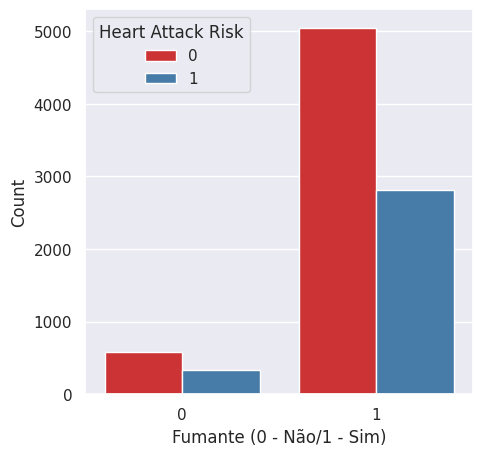

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Smoking', hue='Heart Attack Risk', palette='Set1')
plt.xlabel('Fumante (0 - Não/1 - Sim)')
plt.ylabel('Count')
plt.show()


No gráfico em análise, é possível observar uma distinção clara entre dois conjuntos de dados. À esquerda, representado em azul, encontram-se as pessoas que não fazem o uso de tabaco, enquanto o risco de ocorrência de ataques cardíacos está indicado em marrom, também à esquerda. Por outro lado, à direita, os fumantes estão representados em azul, com o risco de ataques cardíacos evidenciado em marrom, igualmente à direita. 

### Como o nível de consumo de álcool está associado ao risco de ataque cardíaco?

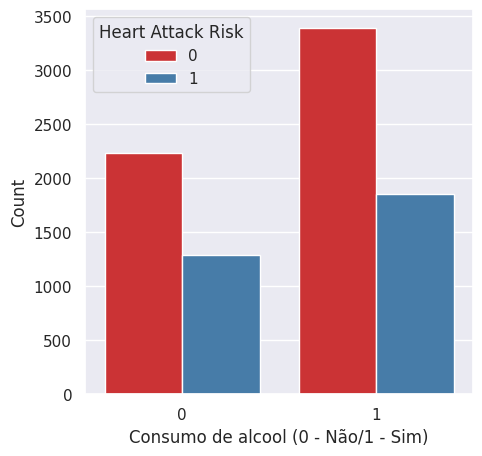

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Alcohol Consumption', hue='Heart Attack Risk', palette='Set1')
plt.xlabel('Consumo de alcool (0 - Não/1 - Sim)')
plt.ylabel('Count')
plt.show()

No que concerne ao gráfico apresentado, é possível observar uma distinção clara entre dois grupos distintos. À esquerda, a representação em azul corresponde às pessoas que não consomem álcool, enquanto o risco de ocorrência de ataque cardíaco é destacado em marrom, igualmente posicionado à esquerda. Na porção direita do gráfico, as pessoas que fazem uso de álcool são representadas em azul, e o risco de desenvolvimento de ataque cardíaco é evidenciado em marrom, também localizado à direita. Essa disposição visualiza de maneira nítida as relações entre o consumo de álcool e o risco de eventos cardíacos, permitindo uma análise comparativa entre os dois grupos.
